# Projeto Dashboard Treino e Dieta - Gabriel Ferreira

## 1. Processso de ETL

In [1]:
# Instalando pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados
hevy_dados = pd.read_csv('workouts_12out2024.csv')

In [3]:
# Shape
hevy_dados.shape

(5276, 14)

In [4]:
# Amostra dos dados
hevy_dados.sample(10)

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
2876,Costas + Biceps + Lombar - Treino 2,"13 Apr 2024, 10:53","13 Apr 2024, 12:12",Treino 5\nAdicionar mais 3 de bíceps,Crunch (Machine),NaN,NaN,7,normal,12.00,7.0,NaN,NaN,NaN
1587,Perna (Treino 3),"3 Jul 2024, 07:45","3 Jul 2024, 08:54",Leg day curto,Squat (Smith Machine),NaN,NaN,0,normal,80.00,10.0,NaN,NaN,NaN
1166,Morning workout ☀️,"12 Jan 2024, 12:00","12 Jan 2024, 13:07",NaN,Bench Dip,NaN,NaN,0,normal,NaN,15.0,NaN,NaN,NaN
1831,Peito + Triceps + Panturilha + Abs (Treino 1 e 4),"17 Jun 2024, 19:24","17 Jun 2024, 20:33",NaN,Standing Calf Raise (Machine),NaN,NaN,5,normal,40.00,20.0,NaN,NaN,NaN
1424,Costas + Biceps + Lombar,"16 Jul 2024, 07:50","16 Jul 2024, 08:50",Mais curto hj,Hammer Curl (Cable),NaN,NaN,2,failure,28.75,8.0,NaN,NaN,NaN
1272,Peitchola,"1 Dec 2023, 12:00","1 Dec 2023, 13:06",NaN,Incline Bench Press (Dumbbell),NaN,NaN,2,normal,37.50,9.0,NaN,NaN,NaN
735,Costas + Biceps + Lombar,"20 Aug 2024, 07:30","20 Aug 2024, 08:43",NaN,Seated Row (Machine),NaN,Banco 9\nRegulagrm 4\n\nStrap nas duas últimas,0,normal,68.00,9.0,NaN,NaN,NaN
2194,Peito + Triceps + Panturilha - Treino 1,"25 May 2024, 11:33","25 May 2024, 12:58",Deload do mala,Back Extension (Hyperextension),NaN,1 sem peso\nResto anilha dd 10,0,normal,NaN,15.0,NaN,NaN,NaN
246,Perna Completo,"25 Sep 2024, 07:35","25 Sep 2024, 08:58",NaN,Seated Leg Curl (Machine),NaN,NaN,2,normal,90.00,9.0,NaN,NaN,NaN
2291,Ombro + Trapézio + Adultora + Abs - Treino 3,"18 May 2024, 10:49","18 May 2024, 12:15",Last day bulking #🥲,Single Arm Lateral Raise (Cable),NaN,NaN,0,normal,7.50,14.0,NaN,NaN,NaN


In [5]:
# Tipo de dados
hevy_dados.dtypes

title                object
start_time           object
end_time             object
description          object
exercise_title       object
superset_id         float64
exercise_notes       object
set_index             int64
set_type             object
weight_kg           float64
reps                float64
distance_km         float64
duration_seconds    float64
rpe                 float64
dtype: object

Observa-se que o start_time e end_time estão como object e deveriam ser datas.

In [6]:
# Colunas
hevy_dados.columns

Index(['title', 'start_time', 'end_time', 'description', 'exercise_title',
       'superset_id', 'exercise_notes', 'set_index', 'set_type', 'weight_kg',
       'reps', 'distance_km', 'duration_seconds', 'rpe'],
      dtype='object')

In [7]:
# Ajuste dos nomes das colunas
df_hevy_dados = pd.DataFrame({
    'treino': hevy_dados['title'],  
    'inicio_treino': hevy_dados['start_time'], 
    'fim_treino': hevy_dados['end_time'],
    'descricao_treino': hevy_dados['description'],
    'exercicio': hevy_dados['exercise_title'],
    'superset_id': hevy_dados['superset_id'],
    'anotacoes_exercicios': hevy_dados['exercise_notes'],
    'serie': hevy_dados['set_index'],
    'tipo_serie': hevy_dados['set_type'],
    'carga_kg': hevy_dados['weight_kg'],
    'repeticoes': hevy_dados['reps'],
    'distancia_km': hevy_dados['distance_km'],
    'duracao_segundos': hevy_dados['duration_seconds'],
    'rpe': hevy_dados['rpe']
})

In [8]:
# Shape do dataframe
df_hevy_dados.shape

(5276, 14)

In [9]:
# 5 primeiro registros do dataframe
df_hevy_dados.head()

,treino,inicio_treino,fim_treino,descricao_treino,exercicio,superset_id,anotacoes_exercicios,serie,tipo_serie,carga_kg,repeticoes,distancia_km,duracao_segundos,rpe
0,Push 2 e Pull 2,"12 Oct 2024, 08:08","12 Oct 2024, 10:11",Pull 2,Seated Cable Row - V Grip (Cable),NaN,NaN,0,normal,60.00,12.0,NaN,NaN,NaN
1,Push 2 e Pull 2,"12 Oct 2024, 08:08","12 Oct 2024, 10:11",Pull 2,Seated Cable Row - V Grip (Cable),NaN,NaN,1,normal,71.25,12.0,NaN,NaN,NaN
2,Push 2 e Pull 2,"12 Oct 2024, 08:08","12 Oct 2024, 10:11",Pull 2,Seated Cable Row - V Grip (Cable),NaN,NaN,2,normal,75.00,11.0,NaN,NaN,NaN
3,Push 2 e Pull 2,"12 Oct 2024, 08:08","12 Oct 2024, 10:11",Pull 2,Seated Cable Row - V Grip (Cable),NaN,NaN,3,failure,78.75,9.0,NaN,NaN,NaN
4,Push 2 e Pull 2,"12 Oct 2024, 08:08","12 Oct 2024, 10:11",Pull 2,Iso-Lateral Low Row,NaN,1 simultanea\nRestante unilateral \nStrap duas...,0,normal,40.00,11.0,NaN,NaN,NaN


In [10]:
# Criação do dicionário de dados com a descrição de cada variável
df_hevy_dados_dict = {
    "treino": "Nome do treino (Push, Pull, Legs, Push 1, Pull 1, Treino A, etc.",
    "inicio_treino": "Data e horárrio do início do treino.",
    "fim_treino": "Data e horárrio do final do treino.",
    "descricao_treino": "Comentários adicionados ao final do treino.",
    "exercicio": "Nome do exercício realizado.",
    "superset_id": "Index para identificar supersets.",
    "anotacoes_exercicios": "Anotacoes realizadas durante a realizacao do exercicio.",
    "serie": "Numero da serie realizada",
    "tipo_serie": "Tipo de serie (Normal, Failure, Warmup).",
    "carga_kg": "Carga levantado na serie.",
    "repeticoes": "Numero de repeticoes realizadas na serie.",
    "distancia_km": "Distancia em kilometros realizadas no exercicio cardiovascular",
    "duracao_segundos": "Duracao em segundos do exercicio cardiovascular ou exercicio que e controlado por tempo.",
    "rpe": "Rating of Perceived Exertion = Escala de Esforço Percebido. Escala subjetiva para avaliar a intensidade do esforço no treino."
}

Não será necessário a utilização das variáveis: superset_id, distancia_km, duracao_segundos e rpe então vamos tira-las do dataframe

In [11]:
df_hevy_dados.drop(columns=['superset_id', 'distancia_km', 'duracao_segundos', 'rpe'], inplace=True)

In [12]:
df_hevy_dados.columns

Index(['treino', 'inicio_treino', 'fim_treino', 'descricao_treino',
       'exercicio', 'anotacoes_exercicios', 'serie', 'tipo_serie', 'carga_kg',
       'repeticoes'],
      dtype='object')

Não tem a necessidade de se obter o horario incial e final do treino juntamente com a data, portanto precisamos quebrar em uma coluna com a data do treino (data_treino) e também o tempo de treino (horario do inicio_treino e final_treino).

In [13]:
# Converter para datetime
df_hevy_dados['inicio_treino'] = pd.to_datetime(df_hevy_dados['inicio_treino'], format='%d %b %Y, %H:%M')
df_hevy_dados['fim_treino'] = pd.to_datetime(df_hevy_dados['fim_treino'], format='%d %b %Y, %H:%M')

In [14]:
# Calcular a diferença de tempo
df_hevy_dados['tempo_treino'] = df_hevy_dados['fim_treino'] - df_hevy_dados['inicio_treino']

In [15]:
# Extrair a data do treino
df_hevy_dados['data_treino'] = df_hevy_dados['inicio_treino'].dt.strftime('%d/%m/%Y')

In [16]:
# Formatar a duração para horas e minutos
df_hevy_dados['tempo_treino'] = df_hevy_dados['tempo_treino'].apply(lambda x: f"{x.components.hours:02}:{x.components.minutes:02}")

In [17]:
# Verificar as alterações
print(df_hevy_dados[['data_treino', 'tempo_treino']].head())

  data_treino tempo_treino
0  12/10/2024        02:03
1  12/10/2024        02:03
2  12/10/2024        02:03
3  12/10/2024        02:03
4  12/10/2024        02:03


In [18]:
# Removendo as colunas que não são mais necessárias
df_hevy_dados.drop(columns=['inicio_treino', 'fim_treino'], inplace=True)

In [19]:
# 5 primeiro registros do dataframe após alterações
df_hevy_dados.head()

,treino,descricao_treino,exercicio,anotacoes_exercicios,serie,tipo_serie,carga_kg,repeticoes,tempo_treino,data_treino
0,Push 2 e Pull 2,Pull 2,Seated Cable Row - V Grip (Cable),NaN,0,normal,60.00,12.0,02:03,12/10/2024
1,Push 2 e Pull 2,Pull 2,Seated Cable Row - V Grip (Cable),NaN,1,normal,71.25,12.0,02:03,12/10/2024
2,Push 2 e Pull 2,Pull 2,Seated Cable Row - V Grip (Cable),NaN,2,normal,75.00,11.0,02:03,12/10/2024
3,Push 2 e Pull 2,Pull 2,Seated Cable Row - V Grip (Cable),NaN,3,failure,78.75,9.0,02:03,12/10/2024
4,Push 2 e Pull 2,Pull 2,Iso-Lateral Low Row,1 simultanea\nRestante unilateral \nStrap duas...,0,normal,40.00,11.0,02:03,12/10/2024


Para mapeamento de volume de serie semanal e filtros no Dashboard, será necessário criar uma coluna grupo_muscular e fazer uma correspondência com o cada exercício, dividindo por cada grupo muscular.

In [20]:
# Dicionário de Correspondência
exercicio_para_grupo = {
'Ab Scissors': 'Abdominals', 'Ab Wheel': 'Abdominals', 'Bicycle Crunch': 'Abdominals',
'Bicycle Crunch Raised Legs': 'Abdominals', 'Cable Core Palloff Press': 'Abdominals',
'Cable Crunch': 'Abdominals', 'Cable Twist (Down to up)': 'Abdominals',
'Cable Twist (Up to down)': 'Abdominals', 'Crunch': 'Abdominals',
'Crunch (Machine)': 'Abdominals', 'Crunch (Weighted)': 'Abdominals',
'Dead Bug': 'Abdominals', 'Decline Crunch': 'Abdominals',
'Decline Crunch (Weighted)': 'Abdominals', 'Dragon Flag': 'Abdominals',
'Dragonfly': 'Abdominals', 'Elbow to Knee': 'Abdominals',
'Flutter Kicks': 'Abdominals', 'Front Lever Hold': 'Abdominals',
'Front Lever Raise': 'Abdominals', 'Hanging Knee Raise': 'Abdominals',
'Hanging Leg Raise': 'Abdominals', 'Heel Taps': 'Abdominals',
'Hollow Rock': 'Abdominals', 'Jack Knife (Suspension)': 'Abdominals',
'Jackknife Sit Up': 'Abdominals', 'Knee Raise Parallel Bars': 'Abdominals',
'L-Sit Hold': 'Abdominals', 'Landmine 180': 'Abdominals',
'Leg Raise Parallel Bars': 'Abdominals', 'Lying Knee Raise': 'Abdominals',
'Lying Leg Raise': 'Abdominals', 'Oblique Crunch': 'Abdominals',
'Plank': 'Abdominals', 'Reverse Crunch': 'Abdominals',
'Reverse Plank': 'Abdominals', 'Russian Twist (Bodyweight)': 'Abdominals',
'Russian Twist (Weighted)': 'Abdominals', 'Side Bend': 'Abdominals',
'Side Bend (Dumbbell)': 'Abdominals', 'Side Plank': 'Abdominals',
'Hip Abduction (Machine)': 'Abductors', 'Hip Adduction (Machine)': 'Adductors',
'21s Bicep Curl': 'Biceps', 'Bicep Curl (Barbell)': 'Biceps',
'Bicep Curl (Cable)': 'Biceps', 'Bicep Curl (Dumbbell)': 'Biceps',
'Bicep Curl (Machine)': 'Biceps', 'Bicep Curl (Suspension)': 'Biceps',
'Concentration Curl': 'Biceps', 'Cross Body Hammer Curl': 'Biceps',
'Drag Curl': 'Biceps', 'EZ Bar Biceps Curl': 'Biceps',
'Hammer Curl (Band)': 'Biceps', 'Hammer Curl (Cable)': 'Biceps',
'Hammer Curl (Dumbbell)': 'Biceps', 'Kettlebell Curl': 'Biceps',
'Overhead Curl (Cable)': 'Biceps', 'Pinwheel Curl (Dumbbell)': 'Biceps',
'Plate Curl': 'Biceps', 'Preacher Curl (Barbell)': 'Biceps',
'Preacher Curl (Dumbbell)': 'Biceps', 'Preacher Curl (Machine)': 'Biceps',
'Reverse Curl (Barbell)': 'Biceps', 'Reverse Curl (Cable)': 'Biceps',
'Reverse Curl (Dumbbell)': 'Biceps', 'Reverse Grip Concentration Curl': 'Biceps',
'Rope Cable Curl': 'Biceps', 'Seated Incline Curl (Dumbbell)': 'Biceps',
'Single Arm Curl (Cable)': 'Biceps', 'Calf Extension (Machine)': 'Calves',
'Calf Press (Machine)': 'Calves', 'Seated Calf Raise': 'Calves',
'Single Leg Standing Calf Raise (Machine)': 'Calves',
'Standing Calf Raise (Machine)': 'Calves', 'Aerobics': 'Cardio',
'Air Bike': 'Cardio', 'Battle Ropes': 'Cardio', 'Boxing': 'Cardio',
'Climbing': 'Cardio', 'Cycling': 'Cardio', 'Elliptical Trainer': 'Cardio',
'HIIT': 'Cardio', 'Hiking': 'Cardio', 'Jump Rope': 'Cardio',
'Rowing Machine': 'Cardio', 'Running': 'Cardio', 'Treadmill': 'Cardio',
'Around The World': 'Chest', 'Bench Press (Barbell)': 'Chest',
'Bench Press (Cable)': 'Chest', 'Bench Press (Dumbbell)': 'Chest',
'Bench Press (Smith Machine)': 'Chest', 'Bench Press - Wide Grip (Barbell)': 'Chest',
'Butterfly (Pec Deck)': 'Chest', 'Cable Fly Crossovers': 'Chest',
'Chest Dip': 'Chest', 'Chest Dip (Assisted)': 'Chest',
'Chest Dip (Weighted)': 'Chest', 'Chest Fly (Band)': 'Chest',
'Chest Fly (Dumbbell)': 'Chest', 'Chest Fly (Machine)': 'Chest',
'Chest Fly (Suspension)': 'Chest', 'Chest Press (Band)': 'Chest',
'Chest Press (Machine)': 'Chest', 'Clap Push Ups': 'Chest',
'Decline Bench Press (Barbell)': 'Chest', 'Decline Bench Press (Dumbbell)': 'Chest',
'Decline Bench Press (Machine)': 'Chest', 'Decline Bench Press (Smith Machine)': 'Chest',
'Decline Chest Fly (Dumbbell)': 'Chest', 'Decline Push Up': 'Chest',
'Dumbbell Squeeze Press': 'Chest', 'Floor Press (Barbell)': 'Chest',
'Floor Press (Dumbbell)': 'Chest', 'Hex Press (Dumbbell)': 'Chest',
'Incline Bench Press (Barbell)': 'Chest', 'Incline Bench Press (Dumbbell)': 'Chest',
'Incline Bench Press (Smith Machine)': 'Chest', 'Incline Chest Fly (Dumbbell)': 'Chest',
'Incline Chest Press (Machine)': 'Chest', 'Incline Push Ups': 'Chest',
'Iso-Lateral Chest Press (Machine)': 'Chest', 'Kneeling Push Up': 'Chest',
'Low Cable Fly Crossovers': 'Chest', 'Plank Pushup': 'Chest',
'Plate Press': 'Chest', 'Plate Squeeze (Svend Press)': 'Chest',
'Pullover (Dumbbell)': 'Chest', 'Pullover (Machine)': 'Chest',
'Push Up': 'Chest', 'Push Up (Weighted)': 'Chest',
'Push Up - Close Grip': 'Chest', 'Seated Chest Flys (Cable)': 'Chest',
'Single Arm Cable Crossover': 'Chest',
'Behind the Back Bicep Wrist Curl (Barbell)': 'Forearms',
'Seated Palms Up Wrist Curl': 'Forearms', 'Seated Wrist Extension (Barbell)': 'Forearms',
'Ball Slams': 'Full Body', 'Burpee': 'Full Body', 'Burpee Over the Bar': 'Full Body',
'Clean': 'Full Body', 'Clean and Jerk': 'Full Body', 'Clean and Press': 'Full Body',
'Clean Pull': 'Full Body', 'Deadlift High Pull': 'Full Body',
'Downward Dog': 'Full Body', 'Dumbbell Snatch': 'Full Body',
'Farmers Walk': 'Full Body', 'Frog Jumps': 'Full Body',
'Handstand Hold': 'Full Body', 'Hang Clean': 'Full Body',
'Hang Snatch': 'Full Body', 'Jump Shrug': 'Full Body',
'Jumping Jack': 'Full Body', 'Kettlebell Clean': 'Full Body',
'Kettlebell High Pull': 'Full Body', 'Kettlebell Shoulder Press': 'Full Body',
'Kettlebell Snatch': 'Full Body', 'Kettlebell Swing': 'Full Body',
'Kettlebell Turkish Get Up': 'Full Body', 'Landmine Squat and Press': 'Full Body',
'Mountain Climber': 'Full Body', 'Muscle Up': 'Full Body',
'One Arm Push Up': 'Full Body', 'Overhead Squat': 'Full Body',
'Pilates': 'Full Body', 'Power Clean': 'Full Body', 'Power Snatch': 'Full Body',
'Press Under': 'Full Body', 'Bird Dog': 'Glutes', 'Cable Pull Through': 'Glutes',
'Clamshell': 'Glutes', 'Fire Hydrants': 'Glutes', 'Frog Pumps (Dumbbell)': 'Glutes',
'Glute Bridge': 'Glutes', 'Glute Kickback (Machine)': 'Glutes',
'Glute Kickback on Floor': 'Glutes', 'High Knees': 'Glutes',
'Hip Thrust': 'Glutes', 'Hip Thrust (Barbell)': 'Glutes',
'Hip Thrust (Machine)': 'Glutes', 'Lateral Band Walks': 'Glutes',
'Lateral Leg Raises': 'Glutes', 'Reverse Hyperextension': 'Glutes',
'Single Leg Glute Bridge': 'Glutes', 'Single Leg Hip Thrust': 'Glutes',
'Single Leg Hip Thrust (Dumbbell)': 'Glutes', 'Deadlift (Band)': 'Hamstrings',
'Deadlift (Barbell)': 'Hamstrings', 'Deadlift (Dumbbell)': 'Hamstrings',
'Deadlift (Smith Machine)': 'Hamstrings', 'Deadlift (Trap bar)': 'Hamstrings',
'Glute Ham Raise': 'Hamstrings', 'Good Morning (Barbell)': 'Hamstrings',
'Lying Leg Curl (Machine)': 'Hamstrings', 'Nordic Hamstrings Curls': 'Hamstrings',
'Reverse Lunge (Dumbbell)': 'Hamstrings', 'Romanian Deadlift (Barbell)': 'Hamstrings',
'Romanian Deadlift (Dumbbell)': 'Hamstrings', 'Seated Leg Curl (Machine)': 'Hamstrings',
'Standing Leg Curls': 'Hamstrings', 'Chin Up': 'Lats', 'Chin Up (Assisted)': 'Lats',
'Chin Up (Weighted)': 'Lats', 'Iso-Lateral High Row (Machine)': 'Lats',
'Iso-Lateral Low Row': 'Lats', 'Iso-Lateral Row (Machine)': 'Lats',
'Kipping Pull Up': 'Lats', 'Kneeling Pulldown (band)': 'Lats',
'Lat Pulldown (Band)': 'Lats', 'Lat Pulldown (Cable)': 'Lats',
'Lat Pulldown (Machine)': 'Lats', 'Lat Pulldown - Close Grip (Cable)': 'Lats',
'Negative Pull Up': 'Lats', 'Pull Up': 'Lats', 'Pull Up (Assisted)': 'Lats',
'Pull Up (Band)': 'Lats', 'Pull Up (Weighted)': 'Lats',
'Rope Straight Arm Pulldown': 'Lats', 'Single Arm Lat Pulldown': 'Lats',
'Back Extension (Hyperextension)': 'Lower Back', 'Back Extension (Machine)': 'Lower Back',
'Back Extension (Weighted Hyperextension)': 'Lower Back', 'Rack Pull': 'Lower Back',
'Lying Neck Curls': 'Neck', 'Lying Neck Curls (Weighted)': 'Neck',
'Lying Neck Extension': 'Neck', 'Lying Neck Extension (Weighted)': 'Neck',
'Assisted Pistol Squats': 'Quadriceps', 'Box Jump': 'Quadriceps',
'Box Squat (Barbell)': 'Quadriceps', 'Bulgarian Split Squat': 'Quadriceps',
'Curtsy Lunge (Dumbbell)': 'Quadriceps', 'Dumbbell Step Up': 'Quadriceps',
'Front Squat': 'Quadriceps', 'Full Squat': 'Quadriceps',
'Goblet Squat': 'Quadriceps', 'Hack Squat': 'Quadriceps',
'Hack Squat (Machine)': 'Quadriceps', 'High Knee Skips': 'Quadriceps',
'Jump Squat': 'Quadriceps', 'Jumping Lunge': 'Quadriceps',
'Kettlebell Goblet Squat': 'Quadriceps', 'Lateral Box Jump': 'Quadriceps',
'Lateral Lunge': 'Quadriceps', 'Lateral Squat': 'Quadriceps',
'Leg Extension (Machine)': 'Quadriceps', 'Leg Press (Machine)': 'Quadriceps',
'Leg Press Horizontal (Machine)': 'Quadriceps', 'Lunge': 'Quadriceps',
'Lunge (Barbell)': 'Quadriceps', 'Lunge (Dumbbell)': 'Quadriceps',
'Overhead Dumbbell Lunge': 'Quadriceps', 'Pause Squat (Barbell)': 'Quadriceps',
'Pendulum Squat (Machine)': 'Quadriceps', 'Pistol Squat': 'Quadriceps',
'Reverse Lunge': 'Quadriceps', 'Reverse Lunge (Barbell)': 'Quadriceps',
'Single Leg Extensions': 'Quadriceps', 'Single Leg Press (Machine)': 'Quadriceps',
'Squat (Smith Machine)': 'Quadriceps', 'Squat (Bodyweight)': 'Quadriceps',
'Squat (Barbell)': 'Quadriceps', 'Arnold Press (Dumbbell)': 'Shoulders',
'Band Pullaparts': 'Shoulders', 'Chest Supported Y Raise (Dumbbell)': 'Shoulders',
'Face Pull': 'Shoulders', 'Front Raise (Band)': 'Shoulders',
'Front Raise (Barbell)': 'Shoulders', 'Front Raise (Cable)': 'Shoulders',
'Front Raise (Dumbbell)': 'Shoulders', 'Front Raise (Suspension)': 'Shoulders',
'Handstand Push Up': 'Shoulders', 'Lateral Raise (Band)': 'Shoulders',
'Lateral Raise (Cable)': 'Shoulders', 'Lateral Raise (Dumbbell)': 'Shoulders',
'Lateral Raise (Machine)': 'Shoulders', 'Overhead Press (Barbell)': 'Shoulders',
'Overhead Press (Dumbbell)': 'Shoulders', 'Overhead Press (Smith Machine)': 'Shoulders',
'Plate Front Raise': 'Shoulders', 'Push Press': 'Shoulders',
'Seated Lateral Raise (Dumbbell)': 'Shoulders', 'Seated Overhead Press (Barbell)': 'Shoulders',
'Seated Overhead Press (Dumbbell)': 'Shoulders', 'Seated Shoulder Press (Machine)': 'Shoulders',
'Shoulder Press (Dumbbell)': 'Shoulders', 'Shoulder Press (Machine Plates)': 'Shoulders',
'Shoulder Taps': 'Shoulders', 'Single Arm Landmine Press (Barbell)': 'Shoulders',
'Single Arm Lateral Raise (Cable)': 'Shoulders', 'Upright Row (Barbell)': 'Shoulders',
'Shrug (Barbell)': 'Traps', 'Shrug (Cable)': 'Traps', 'Shrug (Dumbbell)': 'Traps',
'Shrug (Machine)': 'Traps', 'Shrug (Smith Machine)': 'Traps',
'Bench Dip': 'Triceps', 'Bench Press - Close Grip (Barbell)': 'Triceps',
'Diamond Push Up': 'Triceps', 'Floor Triceps Dip': 'Triceps',
'JM Press (Barbell)': 'Triceps', 'Pike Pushup': 'Triceps',
'Ring Dips': 'Triceps', 'Seated Dip Machine': 'Triceps',
'Seated Triceps Press': 'Triceps', 'Single Arm Tricep Extension (Dumbbell)': 'Triceps',
'Single Arm Triceps Pushdown (Cable)': 'Triceps', 'Triceps Rope Pushdown': 'Triceps',
'Skullcrusher (Barbell)': 'Triceps', 'Triceps Pushdown': 'Triceps',
'Triceps Extension (Cable)': 'Triceps', 'Skullcrusher (Cable)': 'Triceps',
'Bent Over Row (Band)': 'Upper Back', 'Bent Over Row (Barbell)': 'Upper Back',
'Bent Over Row (Dumbbell)': 'Upper Back', 'Chest Supported Incline Row (Dumbbell)': 'Upper Back',
'Chest Supported Reverse Fly (Dumbbell)': 'Upper Back', 'Dead Hang': 'Upper Back',
'Dumbbell Row': 'Upper Back', 'Gorilla Row (Kettlebell)': 'Upper Back',
'Inverted Row': 'Upper Back', 'Landmine Row': 'Upper Back',
'Low Row (Suspension)': 'Upper Back', 'Meadows Rows (Barbell)': 'Upper Back',
'Pendlay Row (Barbell)': 'Upper Back', 'Rear Delt Reverse Fly (Cable)': 'Upper Back',
'Rear Delt Reverse Fly (Dumbbell)': 'Upper Back', 'Rear Delt Reverse Fly (Machine)': 'Upper Back',
'Renegade Row (Dumbbell)': 'Upper Back', 'Reverse Fly Single Arm (Cable)': 'Upper Back',
'Reverse Grip Lat Pulldown (Cable)': 'Upper Back', 'Scapular Pull Ups': 'Upper Back',
'Seated Cable Row - Bar Grip': 'Upper Back', 'Seated Cable Row - Bar Wide Grip': 'Upper Back',
'Seated Cable Row - V Grip (Cable)': 'Upper Back', 'Seated Row (Machine)': 'Upper Back',
'Single Arm Cable Row': 'Upper Back', 'Stair Machine': 'Cardio'
}

In [21]:
# Aplicando o "PROCV"
df_hevy_dados['grupo_muscular'] = df_hevy_dados['exercicio'].map(exercicio_para_grupo)

In [22]:
# Verificando mudanças
print(df_hevy_dados[['exercicio', 'grupo_muscular']].head())

                           exercicio grupo_muscular
0  Seated Cable Row - V Grip (Cable)     Upper Back
1  Seated Cable Row - V Grip (Cable)     Upper Back
2  Seated Cable Row - V Grip (Cable)     Upper Back
3  Seated Cable Row - V Grip (Cable)     Upper Back
4                Iso-Lateral Low Row           Lats


In [23]:
# Verificando se houve algum exercicio sem correspondência
valores_nao_correspondidos = df_hevy_dados[df_hevy_dados['grupo_muscular'].isna()]['exercicio'].unique()
print("Exercícios sem correspondência:", valores_nao_correspondidos)

Exercícios sem correspondência: []


In [24]:
# Analisando distribuição das series por grupo muscular
contagem_grupos_musculares = df_hevy_dados['grupo_muscular'].value_counts()
print("Contagem de cada grupo muscular:")
print(contagem_grupos_musculares)

Contagem de cada grupo muscular:
grupo_muscular
Chest         831
Lats          583
Shoulders     582
Triceps       541
Biceps        493
Upper Back    371
Quadriceps    361
Hamstrings    250
Lower Back    240
Calves        231
Abdominals    187
Traps         157
Cardio        120
Forearms      111
Glutes        111
Adductors     103
Abductors       4
Name: count, dtype: int64


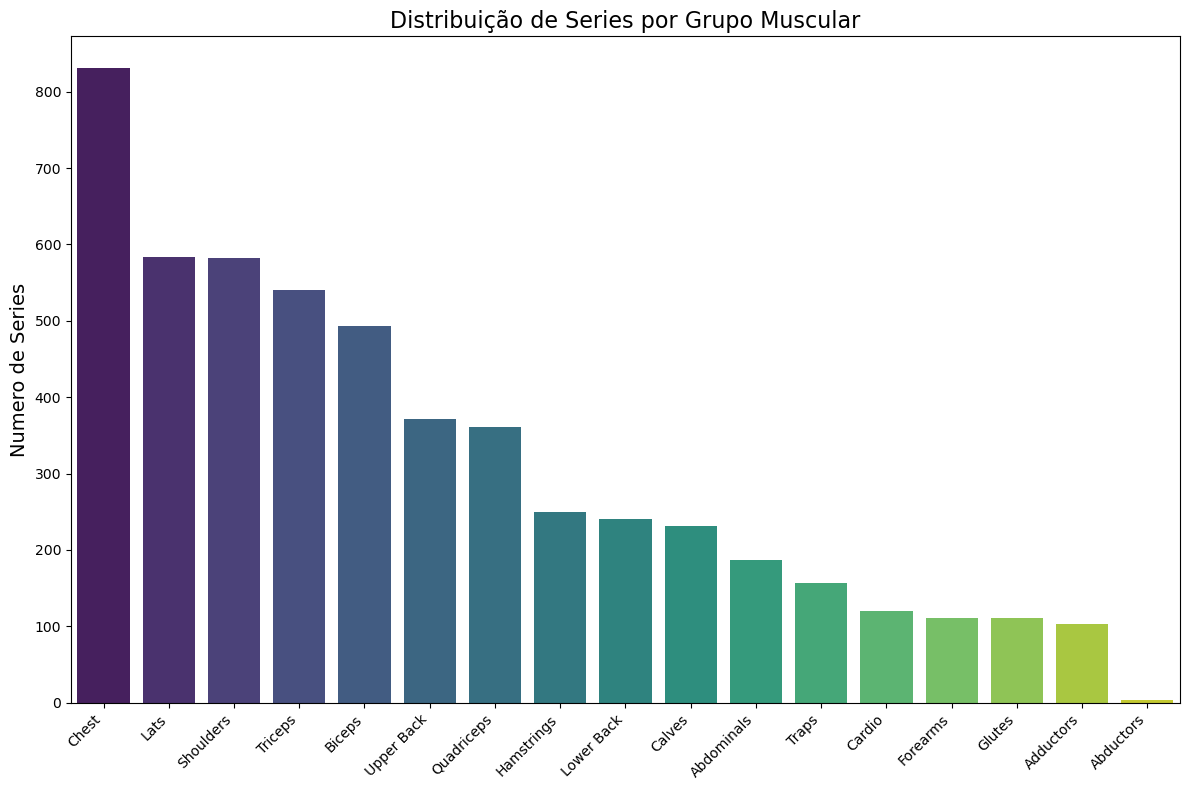

In [25]:
# Gráfico para visualizar a distribuição
plt.figure(figsize=(12, 8))
sns.barplot(x=contagem_grupos_musculares.index, y=contagem_grupos_musculares.values, palette="viridis")
plt.title('Distribuição de Series por Grupo Muscular', fontsize=16)
plt.xlabel('')
plt.ylabel('Numero de Series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [26]:
# Verificando data frame apos transformacao
df_hevy_dados.sample(10)

,treino,descricao_treino,exercicio,anotacoes_exercicios,serie,tipo_serie,carga_kg,repeticoes,tempo_treino,data_treino,grupo_muscular
4714,Treino D - Ombro + Trapezio,NaN,Shrug (Dumbbell),NaN,3,normal,22.5,10.0,00:58,25/12/2023,Traps
2365,Costas + Biceps + Lombar - Treino 2,NaN,Lat Pulldown (Machine),NaN,3,failure,82.5,8.0,01:25,14/05/2024,Lats
1599,Perna (Treino 3),Leg day curto,Treadmill,NaN,0,normal,NaN,NaN,01:09,03/07/2024,Cardio
172,Costas + Biceps + Lombar,Deload week 2/5,Bicep Curl (Machine),NaN,0,normal,54.0,10.0,01:06,01/10/2024,Biceps
51,Legs,Legs - Posterior,Squat (Barbell),NaN,3,normal,100.0,9.0,01:48,09/10/2024,Quadriceps
3610,(S1) - Costas + Biceps + Lombar - Treino 2,NaN,Back Extension (Machine),NaN,3,normal,63.0,11.0,01:06,05/03/2024,Lower Back
2575,Ombro + Trapézio + Adultora + Abs - Treino 3,Treino 3 gambiarra - academia cheias da,Lateral Raise (Machine),NaN,1,normal,53.0,11.0,01:12,01/05/2024,Shoulders
1468,Ombro + Trapézio + Lombar e Panturilha (Sexta)...,Sábado,Standing Calf Raise (Machine),NaN,6,normal,20.0,15.0,01:26,13/07/2024,Calves
233,Ombro + Trapézio + Lombar e Panturilha (Sexta)...,Penúltimo dia de cut,Shrug (Dumbbell),NaN,2,normal,37.5,11.0,01:05,27/09/2024,Traps
4288,Treino C - Pernas,NaN,Leg Extension (Machine),NaN,0,normal,67.5,12.0,01:00,24/01/2024,Quadriceps


Para analises no Dashboard precisamos criar uma variavel chamada 1RM.

1 RM (Uma Repetição Máxima) é a quantidade máxima de peso que uma pessoa consegue levantar em uma única repetição de um exercício, representando o limite máximo de força para aquele movimento.

Temos diversas formulas para calcular o 1 RM, neste caso vamos utilizar:
1 RM = (100 * peso levantado) / (101.3 - 2.67123 * número de repetições)

In [27]:
# Criando coluna 1RM
df_hevy_dados['1RM'] = ((100 * df_hevy_dados['carga_kg']) / (101.3 - 2.67123 * df_hevy_dados['repeticoes'])).round(2)

In [28]:
# Verificando coluna 1RM
print(df_hevy_dados[['carga_kg', 'repeticoes', '1RM']].head())

   carga_kg  repeticoes     1RM
0     60.00        12.0   86.65
1     71.25        12.0  102.90
2     75.00        11.0  104.29
3     78.75         9.0  101.93
4     40.00        11.0   55.62


No dashboard é esperado a opção de filtrar por ciclos de bulking, cutting e dieta reversa, para isso vamos criar uma coluna chamada Cicle.

Cutting
Cutting é uma fase de redução de gordura corporal, geralmente praticada por fisiculturistas e entusiastas do fitness. O objetivo é diminuir o percentual de gordura enquanto se mantém o máximo possível de massa muscular. Isso é alcançado através de uma dieta hipocalórica (consumo calórico menor do que o gasto) combinada com exercícios cardiovasculares.

Bulking
Bulking é uma fase de ganho de massa muscular, onde o foco está em aumentar a ingestão calórica para promover o crescimento muscular. Durante o bulking, as calorias consumidas são maiores do que as gastas, e ele geralmente é acompanhado por um treinamento intenso de resistência para estimular o crescimento muscular.

Dieta Reversa
Dieta Reversa é o processo de aumentar gradualmente a ingestão calórica após um período de déficit calórico (como um cutting) para restaurar o metabolismo a níveis normais. O objetivo é evitar o ganho rápido de gordura enquanto se ajusta o corpo a um nível calórico mais alto, estabilizando o peso e a composição corporal.

In [29]:
# Converter 'data_treino' para o formato datetime (se nao da erro)
df_hevy_dados['data_treino'] = pd.to_datetime(df_hevy_dados['data_treino'], format='%d/%m/%Y')

In [30]:
# Função para deterimnar os intervalos
def determinar_ciclo(data_treino):
    if pd.Timestamp('2023-10-30') <= data_treino <= pd.Timestamp('2024-02-23'):
        return '3Cutting II (30/10/2023 - 23/02/2024)'
    elif pd.Timestamp('2024-02-24') <= data_treino <= pd.Timestamp('2024-03-22'):
        return '4Reversa II (24/02/2024 - 22/03/2024)'
    elif pd.Timestamp('2024-03-23') <= data_treino <= pd.Timestamp('2024-05-19'):
        return '5Bulking I (23/03/2024 - 19/05/2024)'
    elif pd.Timestamp('2024-05-20') <= data_treino <= pd.Timestamp('2024-09-28'):
        return '6Cutting III (20/05/2024 - 28/09/2024)'
    elif pd.Timestamp('2024-09-29') <= data_treino <= pd.Timestamp('2024-10-27'):
        return '7Reversa III (29/09/2024 - 27/10/2024)'
    elif data_treino >= pd.Timestamp('2024-10-28'):
        return '8 Bulking II (28/10/2024 - XX/XX/XXXX)'
    else:
        return 'Data fora dos ciclos definidos'

In [31]:
df_hevy_dados['ciclo'] = df_hevy_dados['data_treino'].apply(determinar_ciclo)

In [32]:
# Verificando coluna ciclo
print(df_hevy_dados[['data_treino', 'ciclo']].head())

  data_treino                                   ciclo
0  2024-10-12  7Reversa III (29/09/2024 - 27/10/2024)
1  2024-10-12  7Reversa III (29/09/2024 - 27/10/2024)
2  2024-10-12  7Reversa III (29/09/2024 - 27/10/2024)
3  2024-10-12  7Reversa III (29/09/2024 - 27/10/2024)
4  2024-10-12  7Reversa III (29/09/2024 - 27/10/2024)


In [33]:
# Verificando valores sem correspondência para a coluna 'ciclo'
print("Linhas sem correspondência:" if (df_hevy_dados['ciclo'] == 'Data fora dos ciclos definidos').any() else "Todas as datas têm correspondência no ciclo.")

Todas as datas têm correspondência no ciclo.


In [34]:
# Distribuiçao de series por ciclo
contagem_ciclos = df_hevy_dados['ciclo'].value_counts()
print("Contagem de cada ciclo:")
print(contagem_ciclos)

Contagem de cada ciclo:
ciclo
6Cutting III (20/05/2024 - 28/09/2024)    1893
3Cutting II (30/10/2023 - 23/02/2024)     1682
5Bulking I (23/03/2024 - 19/05/2024)       987
4Reversa II (24/02/2024 - 22/03/2024)      519
7Reversa III (29/09/2024 - 27/10/2024)     195
Name: count, dtype: int64


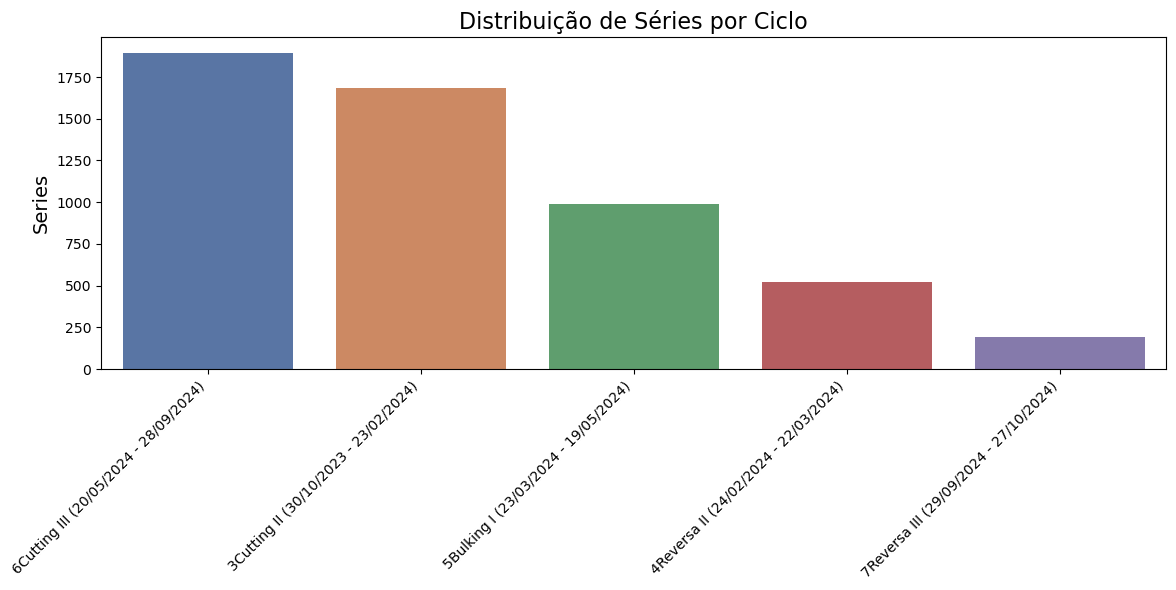

In [35]:
# Grafico para visualizacao
contagem_ciclos = df_hevy_dados['ciclo'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_ciclos.index, y=contagem_ciclos.values, palette="deep")
plt.title('Distribuição de Séries por Ciclo', fontsize=16)
plt.xlabel('')
plt.ylabel('Series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
# Removendo colunas que não existem mais no dicionário
colunas_removidas = ["inicio_treino", "fim_treino", "superset_id", "distancia_km", "duracao_segundos", "rpe"]
for coluna in colunas_removidas:
    df_hevy_dados_dict.pop(coluna, None)

In [37]:
# Adicionando novas colunas ao dicionário
df_hevy_dados_dict.update({
    "tempo_treino": "Duração total do treino em minutos.",
    "data_treino": "Data quando o treino foi realizado.",
    "grupo_muscular": "Grupo muscular principal trabalhado no exercício.",
    "1RM": "Estimativa de uma repetição máxima baseada na fórmula de Epley.",
    "ciclo": "Fase do ciclo de treino em que o exercício foi realizado com base nas datas definidas."
})

In [38]:
# Exibindo o dicionário atualizado para verificar
for coluna, descricao in df_hevy_dados_dict.items():
    print(f"{coluna}: {descricao}\n")

treino: Nome do treino (Push, Pull, Legs, Push 1, Pull 1, Treino A, etc.

descricao_treino: Comentários adicionados ao final do treino.

exercicio: Nome do exercício realizado.

anotacoes_exercicios: Anotacoes realizadas durante a realizacao do exercicio.

serie: Numero da serie realizada

tipo_serie: Tipo de serie (Normal, Failure, Warmup).

carga_kg: Carga levantado na serie.

repeticoes: Numero de repeticoes realizadas na serie.

tempo_treino: Duração total do treino em minutos.

data_treino: Data quando o treino foi realizado.

grupo_muscular: Grupo muscular principal trabalhado no exercício.

1RM: Estimativa de uma repetição máxima baseada na fórmula de Epley.

ciclo: Fase do ciclo de treino em que o exercício foi realizado com base nas datas definidas.



### Análise Exploratória

In [39]:
# Verificando novamente tipo de dados
df_hevy_dados.dtypes

treino                          object
descricao_treino                object
exercicio                       object
anotacoes_exercicios            object
serie                            int64
tipo_serie                      object
carga_kg                       float64
repeticoes                     float64
tempo_treino                    object
data_treino             datetime64[ns]
grupo_muscular                  object
1RM                            float64
ciclo                           object
dtype: object

In [40]:
# Resumo estatístico (variáveis numéricas)
df_hevy_dados.describe()

,serie,carga_kg,repeticoes,data_treino,1RM
count,5276.000000,4812.000000,5155.000000,5276,4812.000000
mean,1.478203,46.216885,10.785257,2024-04-21 21:35:53.449583104,63.587905
min,0.000000,5.000000,4.000000,2023-11-20 00:00:00,-24.970000
25%,0.000000,21.250000,9.000000,2024-02-03 00:00:00,30.170000
50%,1.000000,40.000000,10.000000,2024-04-16 00:00:00,56.330000
75%,2.000000,70.000000,12.000000,2024-07-09 00:00:00,93.860000
max,9.000000,240.000000,111.000000,2024-10-12 00:00:00,310.640000
std,1.326113,29.642750,2.980381,NaN,40.128836


### Detectando valores ausentes

In [41]:
# Visualizando o total de linhas por coluna
df_hevy_dados.count()

treino                  5276
descricao_treino        2045
exercicio               5276
anotacoes_exercicios     645
serie                   5276
tipo_serie              5276
carga_kg                4812
repeticoes              5155
tempo_treino            5276
data_treino             5276
grupo_muscular          5276
1RM                     4812
ciclo                   5276
dtype: int64

In [42]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df_hevy_dados.isnull().sum().sort_values(ascending = False)

In [43]:
print(valores_ausentes)

anotacoes_exercicios    4631
descricao_treino        3231
carga_kg                 464
1RM                      464
repeticoes               121
treino                     0
exercicio                  0
serie                      0
tipo_serie                 0
tempo_treino               0
data_treino                0
grupo_muscular             0
ciclo                      0
dtype: int64


As colunas anotacoes_exercicios e descricao_treino fazem sentido o numero de valores ausentes pois não é todo treino e todo exercicio que tem anotações ou descrições. 

A coluna carga_kg e 1RM faz total sentido pois são dependentes para o calculo de 1RM e os valores ausentes de carga_kg são justificados pois há exercicios que não há carga (Como exercicios com peso corporal e cardiovascular)

Vamos analisar a coluna repeticoes com mais cuidado

In [44]:
# Filtrando linhas onde 'repeticoes' é NaN
linhas_ausentes_repeticoes = df_hevy_dados[df_hevy_dados['repeticoes'].isna()]

# Agrupando por 'grupo_muscular' e contando o número de ocorrências
agrupamento_grupo_muscular = linhas_ausentes_repeticoes.groupby('grupo_muscular').size()

# Exibindo o resultado
print("Distribuição dos grupos musculares para valores ausentes em 'repeticoes':")
print(agrupamento_grupo_muscular)

Distribuição dos grupos musculares para valores ausentes em 'repeticoes':
grupo_muscular
Abdominals      1
Cardio        120
dtype: int64


OK faz sentido cardio sem valores em repeticoes, vamos analisar o abdominals

In [45]:
# Remover espaços em branco e ajustar capitalização na coluna 'grupo_muscular'
df_hevy_dados['grupo_muscular'] = df_hevy_dados['grupo_muscular'].str.strip().str.lower()

# Filtrar linhas onde 'repeticoes' é NaN e 'grupo_muscular' é 'abdominals'
linhas_abdominals = df_hevy_dados[(df_hevy_dados['repeticoes'].isna()) & (df_hevy_dados['grupo_muscular'] == 'abdominals')]

# Exibindo a(s) linha(s) filtrada(s) com cabeçalhos
print(linhas_abdominals.to_string(index=False))

                                treino descricao_treino exercicio anotacoes_exercicios  serie tipo_serie  carga_kg  repeticoes tempo_treino data_treino grupo_muscular  1RM                                 ciclo
(S1 ) Peito + Triceps + Abs - Treino 1         Treino 6     Plank                  NaN      0     normal       NaN         NaN        00:59  2024-02-26     abdominals  NaN 4Reversa II (24/02/2024 - 22/03/2024)


OK o exercicio plank (prancha) não ter repetições

### Detecção de Outliers 

Somente temos a necessidade de detectar outliers nas colunas carga_kg, repeticoes e 1RM, as demais são variáveis categóricas ou indices.

In [46]:
# Função para detectar outliers usando o método IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

In [47]:
# Detectando e exibindo o total de outliers por coluna
colunas = ['carga_kg', 'repeticoes', '1RM']
for coluna in colunas:
    outliers = detectar_outliers(df_hevy_dados, coluna)
    print(f"Total de outliers em '{coluna}': {len(outliers)}")


Total de outliers em 'carga_kg': 43
Total de outliers em 'repeticoes': 209
Total de outliers em '1RM': 44


In [48]:
# Detectar e exibir outliers para a coluna 'carga_kg'
outliers_carga_kg = detectar_outliers(df_hevy_dados, 'carga_kg')

if not outliers_carga_kg.empty:
    print("Outliers em 'carga_kg (43) ':")
    print(outliers_carga_kg[['exercicio', 'data_treino', 'carga_kg', 'repeticoes', '1RM']])

Outliers em 'carga_kg (43) ':
                exercicio data_treino  carga_kg  repeticoes     1RM
1254  Leg Press (Machine)  2024-01-17     160.0        11.0  222.48
1255  Leg Press (Machine)  2024-01-17     160.0        10.0  214.51
1256  Leg Press (Machine)  2024-01-17     200.0        10.0  268.14
1257  Leg Press (Machine)  2024-01-17     200.0        10.0  268.14
3426  Leg Press (Machine)  2024-03-13     160.0        11.0  222.48
3427  Leg Press (Machine)  2024-03-13     160.0        10.0  214.51
3428  Leg Press (Machine)  2024-03-13     200.0        10.0  268.14
3429  Leg Press (Machine)  2024-03-13     200.0        10.0  268.14
3924  Leg Press (Machine)  2024-02-14     200.0        12.0  288.83
3925  Leg Press (Machine)  2024-02-14     200.0        12.0  288.83
3926  Leg Press (Machine)  2024-02-14     200.0        11.0  278.10
4162  Leg Press (Machine)  2024-01-31     200.0        11.0  278.10
4163  Leg Press (Machine)  2024-01-31     200.0        10.0  268.14
4164  Leg Press (M

Otulers em carga_kg -- OK Leg press é um exercicio que de fato é possivel levantar muito peso (absoluto) relacionado aos demais exercicios

In [49]:
# Detectar e exibir outliers para a coluna '1RM'
outliers_1RM = detectar_outliers(df_hevy_dados, '1RM')

if not outliers_1RM.empty:
    print("Outliers em '1RM (44)':")
    print(outliers_1RM[['exercicio', 'data_treino', 'carga_kg', 'repeticoes', '1RM']])

Outliers em '1RM (44)':
                     exercicio data_treino  carga_kg  repeticoes     1RM
1254       Leg Press (Machine)  2024-01-17     160.0        11.0  222.48
1255       Leg Press (Machine)  2024-01-17     160.0        10.0  214.51
1256       Leg Press (Machine)  2024-01-17     200.0        10.0  268.14
1257       Leg Press (Machine)  2024-01-17     200.0        10.0  268.14
2523  Calf Extension (Machine)  2024-05-06     112.5        18.0  211.40
3426       Leg Press (Machine)  2024-03-13     160.0        11.0  222.48
3427       Leg Press (Machine)  2024-03-13     160.0        10.0  214.51
3428       Leg Press (Machine)  2024-03-13     200.0        10.0  268.14
3429       Leg Press (Machine)  2024-03-13     200.0        10.0  268.14
3924       Leg Press (Machine)  2024-02-14     200.0        12.0  288.83
3925       Leg Press (Machine)  2024-02-14     200.0        12.0  288.83
3926       Leg Press (Machine)  2024-02-14     200.0        11.0  278.10
4162       Leg Press (Machi

OK - legpress pelo mesmo motivo da carga

In [50]:
# Detectar e exibir outliers para a coluna 'repeticoes'
outliers_repeticoes = detectar_outliers(df_hevy_dados, 'repeticoes')

if not outliers_repeticoes.empty:
    print("Outliers em 'repeticoes (209) ':")
    print(outliers_repeticoes[['exercicio','carga_kg', 'repeticoes', '1RM']])

Outliers em 'repeticoes (209) ':
                             exercicio  carga_kg  repeticoes     1RM
129      Standing Calf Raise (Machine)      70.0        20.0  146.21
130      Standing Calf Raise (Machine)      70.0        18.0  131.53
189      Standing Calf Raise (Machine)      20.0        20.0   41.78
328      Standing Calf Raise (Machine)      20.0        20.0   41.78
499   Seated Wrist Extension (Barbell)      10.0        19.0   19.78
...                                ...       ...         ...     ...
4363             Triceps Rope Pushdown      17.5        20.0   36.55
4641    Incline Bench Press (Dumbbell)      17.5        20.0   36.55
4691   Seated Shoulder Press (Machine)      37.5        20.0   78.33
4755   Seated Shoulder Press (Machine)      37.5        20.0   78.33
4839   Seated Shoulder Press (Machine)      37.5        20.0   78.33

[209 rows x 4 columns]


Muitos registros.. vamos montar um plot

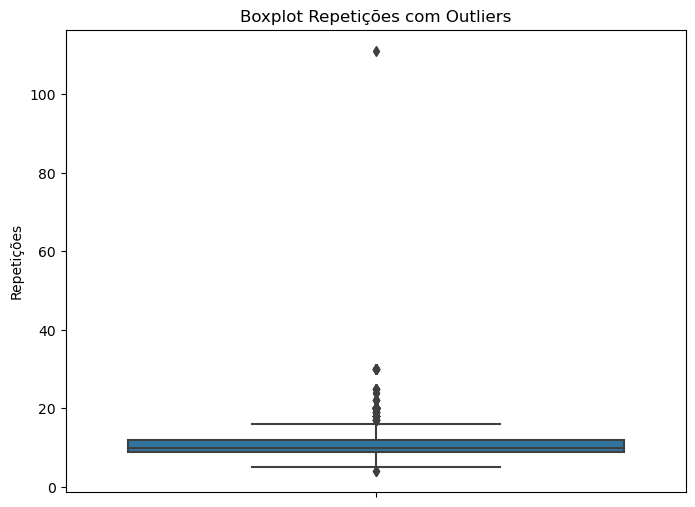

In [51]:
# Gráfico
dados_repeticoes = df_hevy_dados['repeticoes'].dropna()
plt.figure(figsize=(8, 6))
sns.boxplot(y=dados_repeticoes)
plt.title("Boxplot Repetições com Outliers")
plt.ylabel("Repetições")
plt.show()

Vemos um registro com mais de 100 repeticoes e alguns detectados como outliers entre 25 e 35.. vamos analisar os 50 primeiros.

In [52]:
top_50_outliers_repeticoes = outliers_repeticoes.sort_values(by='repeticoes', ascending=False).head(50)
print(top_50_outliers_repeticoes[['exercicio', 'data_treino', 'carga_kg', 'repeticoes',]])

                                   exercicio data_treino  carga_kg  repeticoes
4339                 Preacher Curl (Machine)  2024-01-23     48.75       111.0
2634           Standing Calf Raise (Machine)  2024-04-29     20.00        30.0
2709           Standing Calf Raise (Machine)  2024-04-22     20.00        30.0
2758           Standing Calf Raise (Machine)  2024-04-19     20.00        30.0
2452           Standing Calf Raise (Machine)  2024-05-10     25.00        30.0
2451           Standing Calf Raise (Machine)  2024-05-10     25.00        30.0
599                 Lateral Raise (Dumbbell)  2024-08-30      7.00        30.0
2401           Standing Calf Raise (Machine)  2024-05-13     25.00        30.0
2400           Standing Calf Raise (Machine)  2024-05-13     25.00        30.0
1004                   Squat (Smith Machine)  2024-07-31       NaN        30.0
1044          Incline Bench Press (Dumbbell)  2024-07-29     20.00        30.0
2279           Standing Calf Raise (Machine)  2024-0

Temos um valor incorreto que seria 111 repetições. Os demais exercicios estão OK pois foram ou panturilha o que exige as vezes maior numero de repetições ou em semanas com carga baixa e altas repetições.

Somenta a linha 4339 temos um valor incorreto que seria 111. Na realidade são 11 repetições

In [53]:
# Corrigir o valor na coluna 'repeticoes' para a linha 4339
df_hevy_dados.at[4339, 'repeticoes'] = 11

In [54]:
# Exibir a linha após a correção para confirmar a alteração
print("\nApós a correção:")
print(df_hevy_dados.loc[4339, ['exercicio', 'data_treino', 'carga_kg', 'repeticoes']])


Após a correção:
exercicio      Preacher Curl (Machine)
data_treino        2024-01-23 00:00:00
carga_kg                         48.75
repeticoes                        11.0
Name: 4339, dtype: object


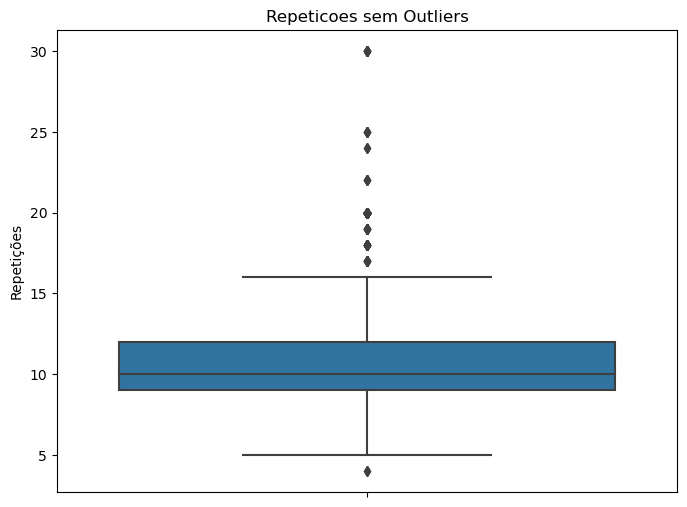

In [55]:
# Grafico
dados_repeticoes = df_hevy_dados['repeticoes'].dropna()
plt.figure(figsize=(8, 6))
sns.boxplot(y=dados_repeticoes)
plt.title("Repeticoes sem Outliers")
plt.ylabel("Repetições")
plt.show()

### Analise Final

In [56]:
df_hevy_dados.sample(50)

,treino,descricao_treino,exercicio,anotacoes_exercicios,serie,tipo_serie,carga_kg,repeticoes,tempo_treino,data_treino,grupo_muscular,1RM,ciclo
5012,Treino B - Peito + Triceps,NaN,Chest Fly (Machine),NaN,0,normal,56.25,11.0,01:04,2023-12-05,chest,78.22,3Cutting II (30/10/2023 - 23/02/2024)
5274,Treino A - Costas + Biceps,NaN,Reverse Curl (Cable),NaN,1,normal,18.75,10.0,00:54,2023-11-21,biceps,25.14,3Cutting II (30/10/2023 - 23/02/2024)
3388,(S1) - Ombro + Trapézio + Abs - Treino 3,Treino 10,Knee Raise Parallel Bars,NaN,2,normal,NaN,10.0,01:34,2024-03-16,abdominals,NaN,4Reversa II (24/02/2024 - 22/03/2024)
3374,(S1) - Ombro + Trapézio + Abs - Treino 3,Treino 10,Lateral Raise (Machine),NaN,0,normal,46.00,12.0,01:34,2024-03-16,shoulders,66.43,4Reversa II (24/02/2024 - 22/03/2024)
1038,Costas + Biceps + Lombar,NaN,Bicep Curl (Machine),NaN,1,normal,54.00,9.0,01:20,2024-07-30,biceps,69.89,6Cutting III (20/05/2024 - 28/09/2024)
3233,(S1) - Ombro + Trapézio + Abs - Treino 3,NaN,Lateral Raise (Dumbbell),Deload — normal 12.5,3,normal,6.00,20.0,00:56,2024-03-23,shoulders,12.53,5Bulking I (23/03/2024 - 19/05/2024)
753,Peito + Triceps + Panturilha,NaN,Chest Press (Machine),NaN,1,normal,90.00,9.0,01:22,2024-08-19,chest,116.49,6Cutting III (20/05/2024 - 28/09/2024)
1905,Costas + Biceps + Lombar (Treino 2),NaN,Pull Up,NaN,0,normal,NaN,10.0,01:29,2024-06-11,lats,NaN,6Cutting III (20/05/2024 - 28/09/2024)
3694,(S2) - Perna - Treino 8,Repetições forçadas na cadeira e o esquema\nQu...,Seated Leg Curl (Machine),NaN,1,normal,82.50,11.0,00:48,2024-02-28,hamstrings,114.72,4Reversa II (24/02/2024 - 22/03/2024)
26,Push 2 e Pull 2,Push 2,Cable Fly Crossovers,NaN,0,normal,10.00,12.0,01:44,2024-10-11,chest,14.44,7Reversa III (29/09/2024 - 27/10/2024)


In [57]:
# Reorganizando colunas
nova_ordem_colunas = [
    'data_treino', 'tempo_treino', 'treino', 'descricao_treino',
    'exercicio', 'serie', 'tipo_serie', 'carga_kg', 'repeticoes',
    '1RM', 'grupo_muscular', 'anotacoes_exercicios', 'ciclo'
]

df_hevy_dados = df_hevy_dados[nova_ordem_colunas]

In [58]:
df_hevy_dados.sample(10)

,data_treino,tempo_treino,treino,descricao_treino,exercicio,serie,tipo_serie,carga_kg,repeticoes,1RM,grupo_muscular,anotacoes_exercicios,ciclo
4893,2023-12-12,01:05,Treino C - Pernas,NaN,Hip Thrust (Machine),3,normal,30.00,9.0,38.83,glutes,NaN,3Cutting II (30/10/2023 - 23/02/2024)
2979,2024-04-08,01:21,Peito + Triceps + Panturilha - Treino 1,NaN,Treadmill,0,normal,NaN,NaN,NaN,cardio,NaN,5Bulking I (23/03/2024 - 19/05/2024)
2458,2024-05-10,01:16,Peito + Triceps + Panturilha - Treino 1,Treino 9\nSenti melhor no treino de peito..,Treadmill,0,normal,NaN,NaN,NaN,cardio,NaN,5Bulking I (23/03/2024 - 19/05/2024)
5053,2023-12-04,01:02,Treino A - Costas + Biceps,NaN,Seated Incline Curl (Dumbbell),0,normal,9.00,11.0,12.51,biceps,NaN,3Cutting II (30/10/2023 - 23/02/2024)
2702,2024-04-22,01:29,Peito + Triceps + Panturilha - Treino 1,NaN,Chest Fly (Machine),3,dropset,75.00,8.0,93.83,chest,Banco 4,5Bulking I (23/03/2024 - 19/05/2024)
4769,2023-12-19,00:40,Treino D - Ombro + Trapezio,NaN,Single Arm Lateral Raise (Cable),2,normal,5.00,10.0,6.70,shoulders,Coloquei 3x por tras… pegou mais,3Cutting II (30/10/2023 - 23/02/2024)
1384,2024-07-19,01:06,Ombro + Trapézio + Lombar e Panturilha (Sexta)...,NaN,Rear Delt Reverse Fly (Machine),2,normal,60.00,8.0,75.07,upper back,NaN,6Cutting III (20/05/2024 - 28/09/2024)
1183,2024-01-20,01:09,Morning workout ☀️,NaN,Lateral Raise (Dumbbell),2,normal,12.50,11.0,17.38,shoulders,NaN,3Cutting II (30/10/2023 - 23/02/2024)
4279,2024-01-26,00:45,Treino A - Peito + Triceps,NaN,Triceps Rope Pushdown,0,normal,21.25,11.0,29.55,triceps,NaN,3Cutting II (30/10/2023 - 23/02/2024)
1601,2024-07-02,01:05,Costas + Biceps + Lombar (Treino 2),NaN,Lat Pulldown (Machine),0,normal,78.75,11.0,109.50,lats,NaN,6Cutting III (20/05/2024 - 28/09/2024)


In [60]:
# Salvar o DataFrame transformado em um novo arquivo
df_hevy_dados.to_csv('etl_dfhevy.csv', index=False)